# **RECCAP Plots**

In [2]:
import numpy as np
import glob
import os
from cdo import Cdo
import sys
import subprocess as sp
import intake
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

import pandas as pd
from tqdm import tqdm 
import xarray as xr
import pandas
import re

import warnings

#import plotting_helpers as ph

sys.path.append("/home/u/u301557/UHH-CMIP6/scripts")
from functions.FUNC_CreateModellist import MODELLIST
from functions.FUNC_CreateModellist import MODELLIST_from_list

sys.path.append("/home/u/u301557/UHH-Sat-SIA/scripts")
from functions.logger_functions import *

cdo = Cdo()
#os.system('module load nco')
#os.environ['HDF5_USE_FILE_LOCKING']='FALSE'

print("DONE")

DONE


In [94]:
datapath = f"/work/uo1227/u301557/ArcticCarbon/data/1D/"            
plotpath = f"/home/u/u301557/ArcticCarbon/plots/Timeseries/"

scenario_colors   = {"ssp119" :"#00a9cf",
             "ssp126" :"#003466",
             "ssp245" :"#f69320",
             "ssp370" :"#df0000",
             "ssp585" :"#980002", 
             "historical":"dimgray"}

In [5]:
def modellist_from_files(files, split_chr="_", split_num=-3):
    modellist = []
    for file in files:
        model = file.split(split_chr)[split_num]
        modellist.append(model)
    return list(set(modellist))
        

## All variables & all models (only number filter)

In [34]:
var = "gpp"
scenario = "historical"
region = "masked"
files = sorted(glob.glob(datapath + f"{var}/{var}_{region}_*_{scenario}.nc"))
modellist = modellist_from_files(files)
print(len(modellist))
print(modellist)

35
['CESM2-WACCM-FV2', 'GISS-E2-1-G', 'CNRM-CM6-1', 'INM-CM4-8', 'NorCPM1', 'EC-Earth3-Veg-LR', 'MPI-ESM-1-2-HAM', 'CESM2', 'NorESM2-MM', 'TaiESM1', 'CESM2-WACCM', 'ACCESS-ESM1-5', 'E3SM-1-1', 'GISS-E2-1-H', 'CanESM5-CanOE', 'INM-CM5-0', 'AWI-ESM-1-1-LR', 'GFDL-ESM4', 'EC-Earth3-Veg', 'E3SM-1-1-ECA', 'CanESM5', 'CMCC-ESM2', 'MRI-ESM2-0', 'CESM2-FV2', 'CMCC-CM2-SR5', 'CNRM-CM6-1-HR', 'EC-Earth3-CC', 'GISS-E2-1-G-CC', 'MPI-ESM1-2-HR', 'NorESM2-LM', 'IPSL-CM6A-LR', 'CNRM-ESM2-1', 'UKESM1-0-LL', 'MIROC-ES2L', 'MPI-ESM1-2-LR']


In [17]:
len(files)

35

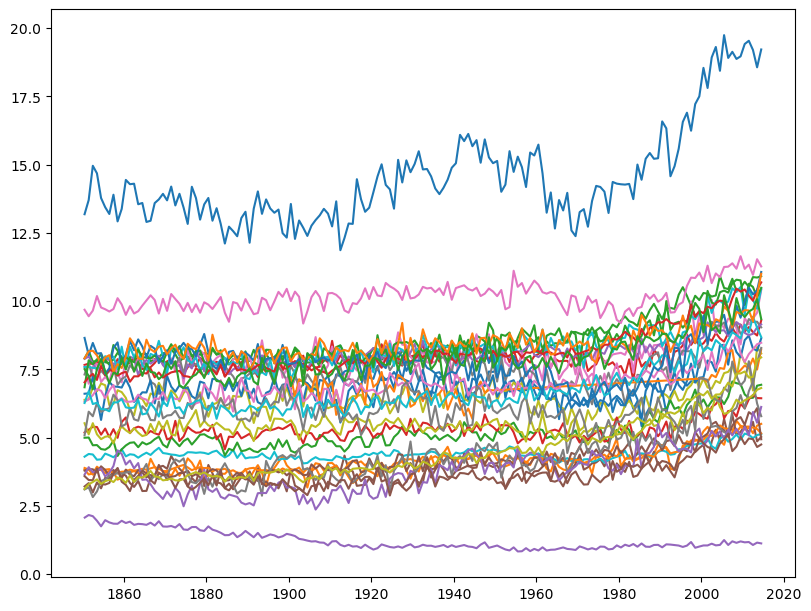

In [20]:
fig, ax = plt.subplots(1, figsize=(8,6), constrained_layout=True)
for model in modellist:
    file = sorted(glob.glob(datapath + f"{var}/{var}_{region}_{model}_*_{scenario}.nc"))[0] # make sure only one member is plotted
    ds = xr.open_dataset(file)
    ds['time'] = ds.time.values.astype('datetime64[ns]')
    if np.nanmean(ds[var].values)<1000:
        ax.plot(ds.time.values, ds[var].values)
    ds.close()
    

In [90]:
var_names = {"fgco2":"Surface Downward Mass Flux of Carbon as CO$_2$", 
             "intpp":"Primary Organic Carbon Production by All Types of Phytoplankton", 
             "intpoc":"Particulate Organic Carbon Content", 
             "intdic":"Dissolved Inorganic Carbon Content", 
             "intdoc":"Dissolved Organic Carbon Content", 
             "fric":"Downward Inorganic Carbon Flux at Ocean Bottom", 
             "froc":"Downward Organic Carbon Flux at Ocean Bottom", 
             "ocfriver":"Flux of Organic Carbon into Ocean Surface by Runoff", 
             "cSoil":"Carbon Mass in Soil Pool", 
             "cVeg":"Carbon Mass in Vegetation", 
             "fLuc":"Land-Use Change", # (into atm.)
             "gpp":"Gross Primary Production on Land", # (out of atm.)
             "nbp":"Net Biospheric Production on Land", # (out of atm.)
             "nep":"Net Ecosystem Productivity on Land", # (out of atm.)
             "npp":"Net Primary Production on Land", 
             "ra":"Autotrophic (Plant) Respiration on Land", # (into atm.)
             "rh":"Total Heterotrophic Respiration on Land as Carbon Mass Flux "}

GISS-E2-1-G-CC fgco2 historical didnt pass number check
GISS-E2-1-G fgco2 historical didnt pass number check


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM fgco2 ssp370 too many NaNs
GISS-E2-1-G intpp historical didnt pass number check


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM intpp ssp370 too many NaNs
GISS-E2-1-G intpoc historical didnt pass number check
MPI-ESM-1-2-HAM intpoc ssp370 too many NaNs
CESM2-WACCM-FV2 intdic historical too many NaNs
GISS-E2-1-G intdic historical didnt pass number check


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM intdic ssp370 too many NaNs
CESM2-WACCM-FV2 intdoc historical too many NaNs
GISS-E2-1-G intdoc historical didnt pass number check
MPI-ESM-1-2-HAM intdoc ssp370 too many NaNs
CNRM-ESM2-1 fric historical didnt pass number check
CNRM-ESM2-1 fric ssp126 didnt pass number check


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

CNRM-ESM2-1 fric ssp370 didnt pass number check
MPI-ESM-1-2-HAM fric ssp370 too many NaNs


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM froc ssp370 too many NaNs
MPI-ESM-1-2-HAM ocfriver ssp370 too many NaNs
CESM2-WACCM cSoil historical didnt pass number check
CESM2 cSoil historical didnt pass number check
NorESM2-LM cSoil historical didnt pass number check


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

CESM2-WACCM cSoil ssp370 didnt pass number check
MPI-ESM-1-2-HAM cSoil ssp370 too many NaNs
CESM2-WACCM-FV2 cVeg historical too many NaNs
E3SM-1-1-ECA cVeg historical didnt pass number check
E3SM-1-1 cVeg historical didnt pass number check
GFDL-ESM4 cVeg historical too many NaNs


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM cVeg ssp370 too many NaNs


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM fLuc ssp370 too many NaNs
CESM2-FV2 gpp historical too many NaNs
CESM2-WACCM-FV2 gpp historical too many NaNs
E3SM-1-1-ECA gpp historical didnt pass number check
E3SM-1-1 gpp historical didnt pass number check


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM gpp ssp370 too many NaNs
E3SM-1-1-ECA nbp historical didnt pass number check
E3SM-1-1 nbp historical didnt pass number check
GISS-E2-1-G nbp historical didnt pass number check
GISS-E2-1-H nbp historical didnt pass number check


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

GISS-E2-1-G nbp ssp370 didnt pass number check
MPI-ESM-1-2-HAM nbp ssp370 too many NaNs


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM nep ssp370 too many NaNs
CESM2-FV2 npp historical too many NaNs
CESM2-WACCM-FV2 npp historical too many NaNs


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM npp ssp370 too many NaNs
CESM2-FV2 ra historical too many NaNs
CESM2-WACCM-FV2 ra historical too many NaNs
E3SM-1-1-ECA ra historical didnt pass number check
E3SM-1-1 ra historical didnt pass number check
GFDL-ESM4 ra historical too many NaNs


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

CESM2 ra ssp370 too many NaNs
MPI-ESM-1-2-HAM ra ssp370 too many NaNs
CESM2-FV2 rh historical too many NaNs
CESM2-WACCM-FV2 rh historical too many NaNs
E3SM-1-1-ECA rh historical didnt pass number check
E3SM-1-1 rh historical didnt pass number check
GFDL-ESM4 rh historical too many NaNs


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM rh ssp370 too many NaNs


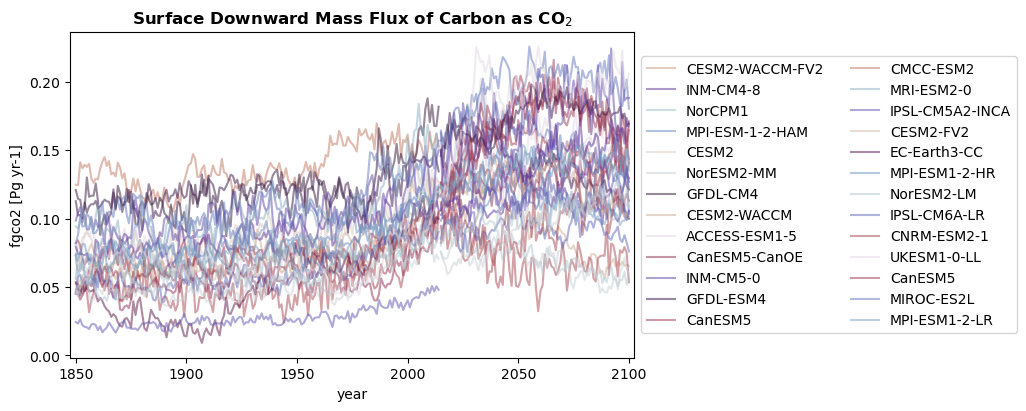

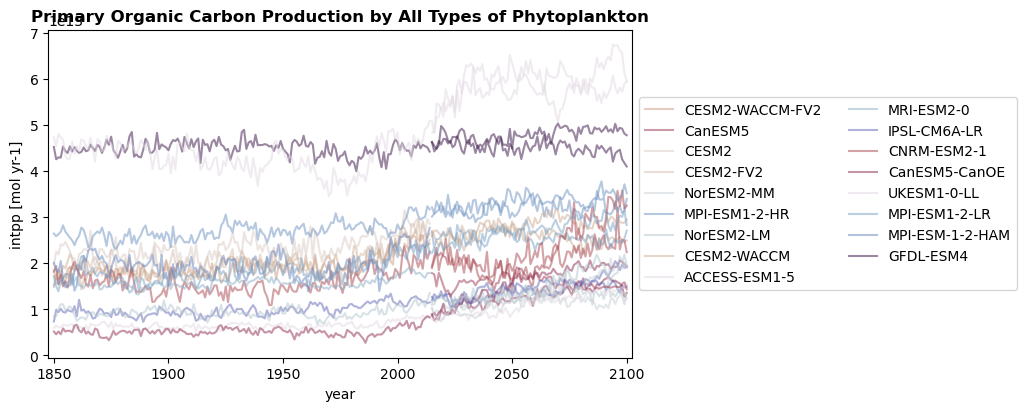

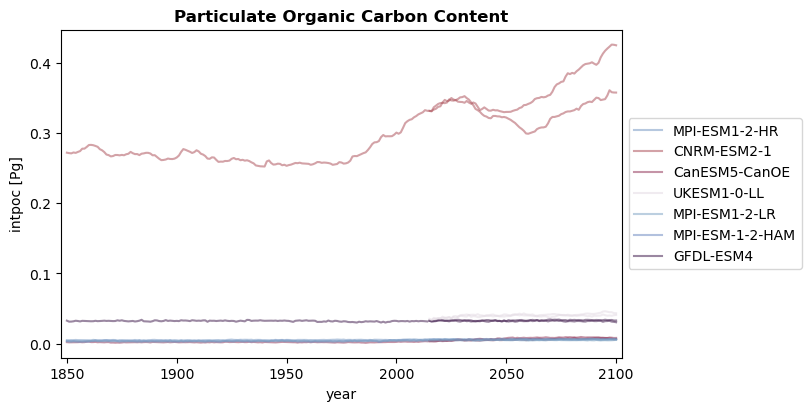

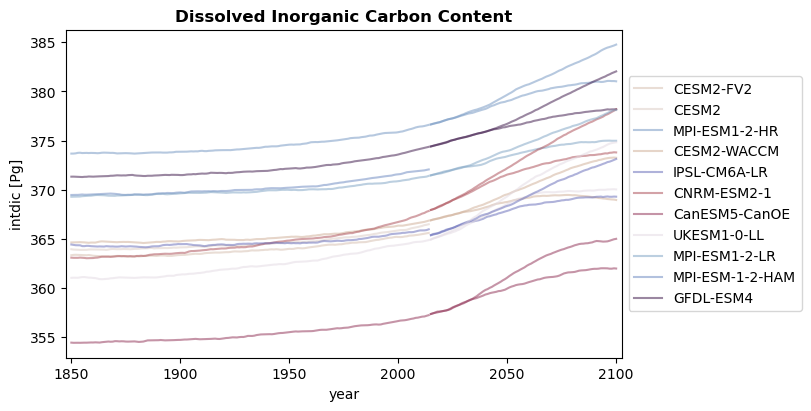

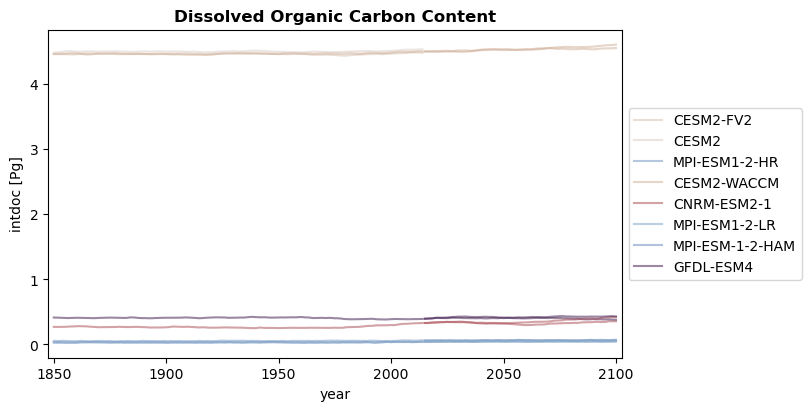

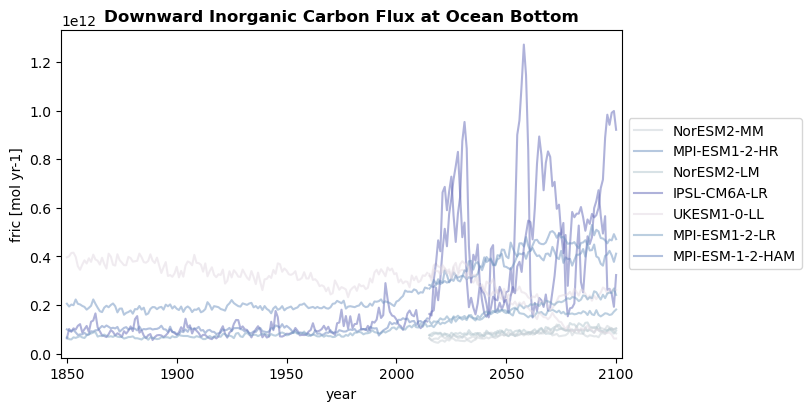

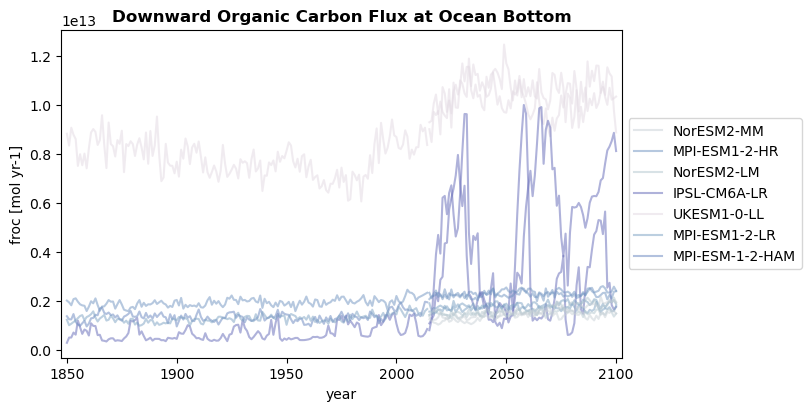

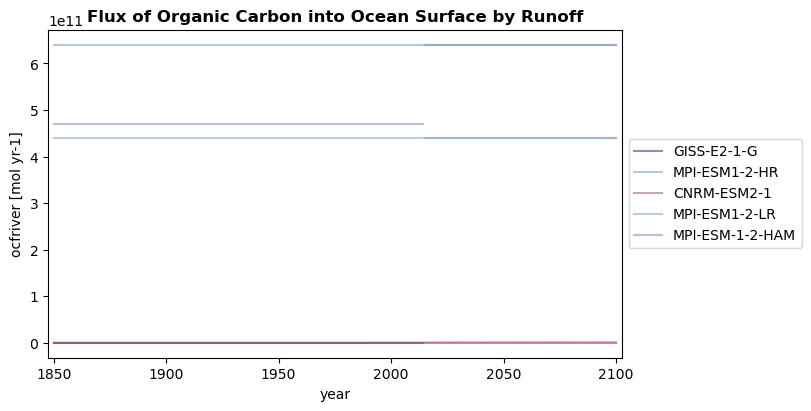

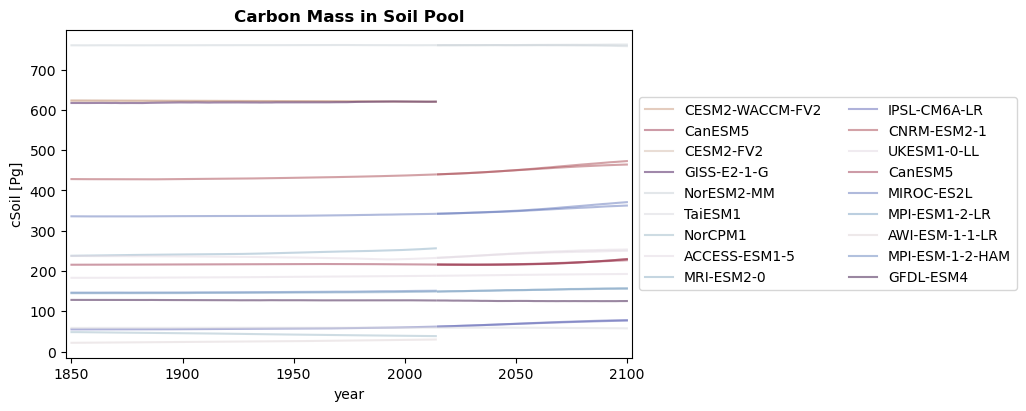

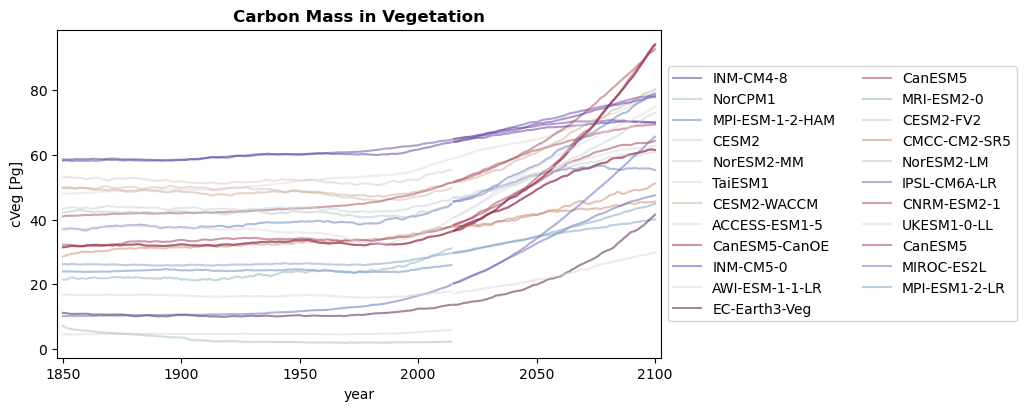

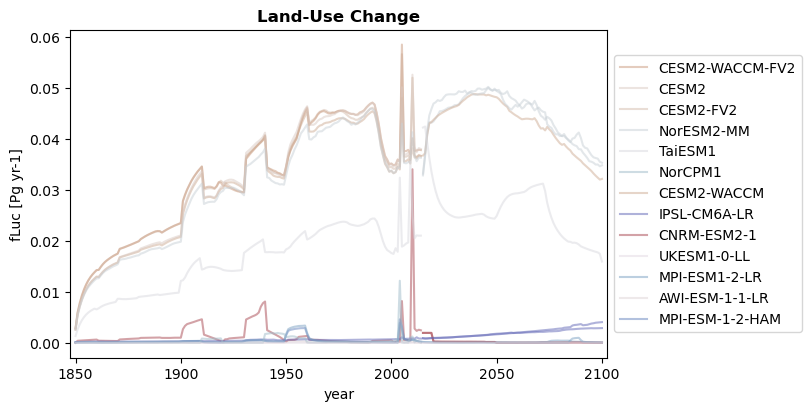

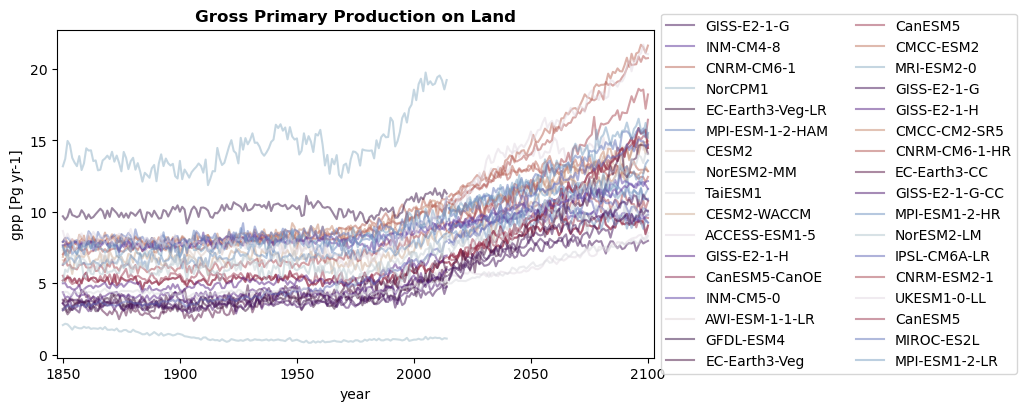

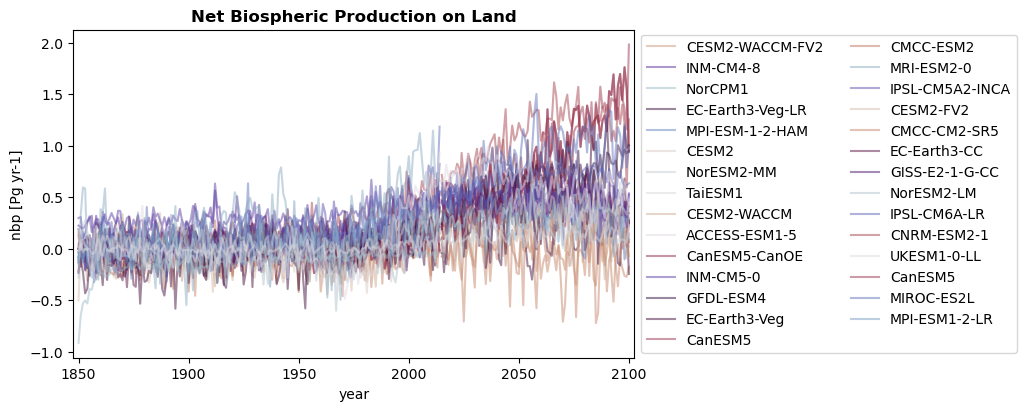

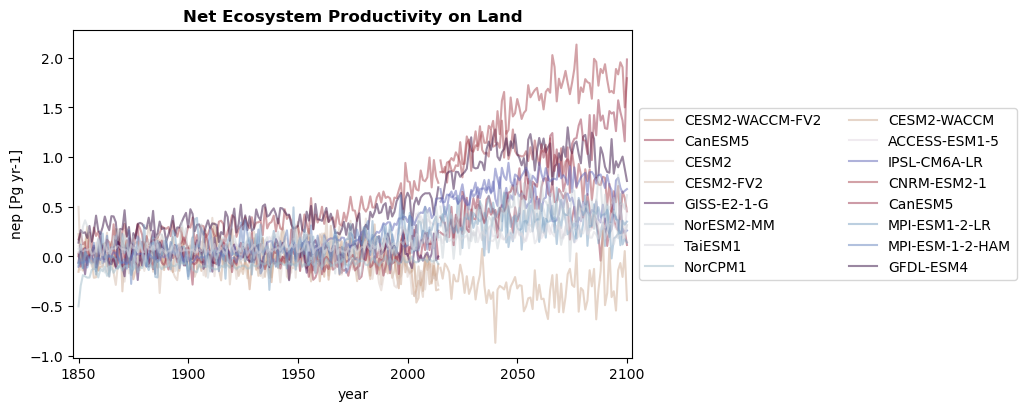

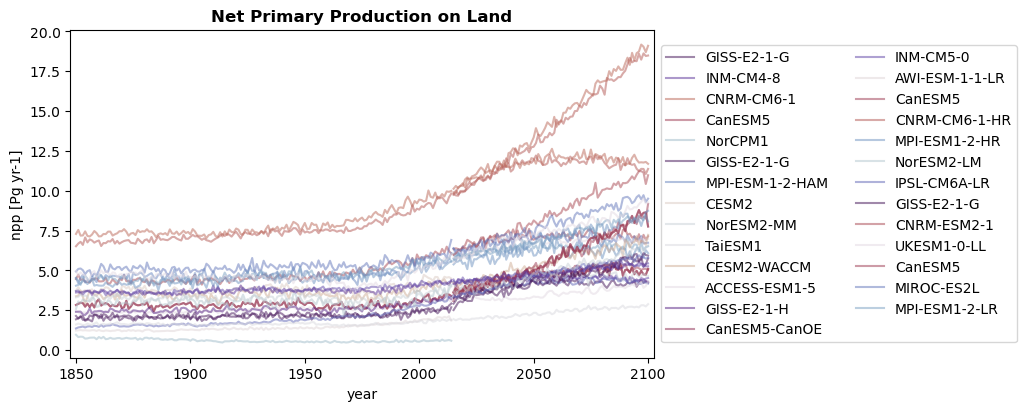

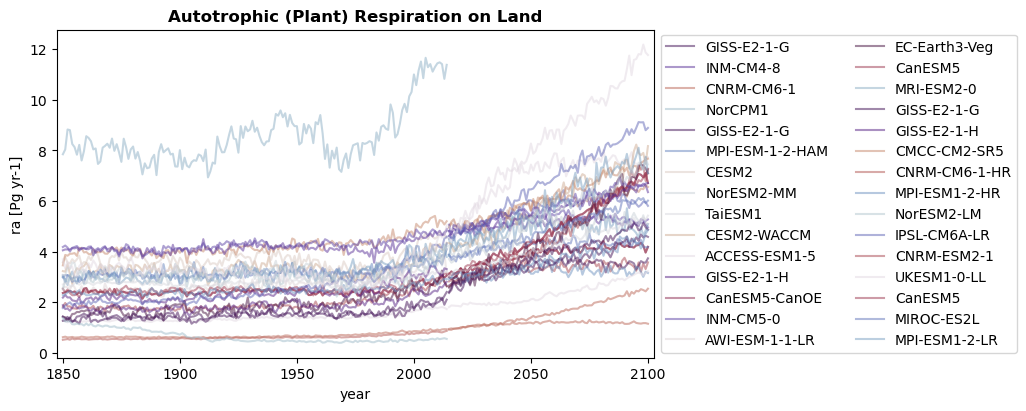

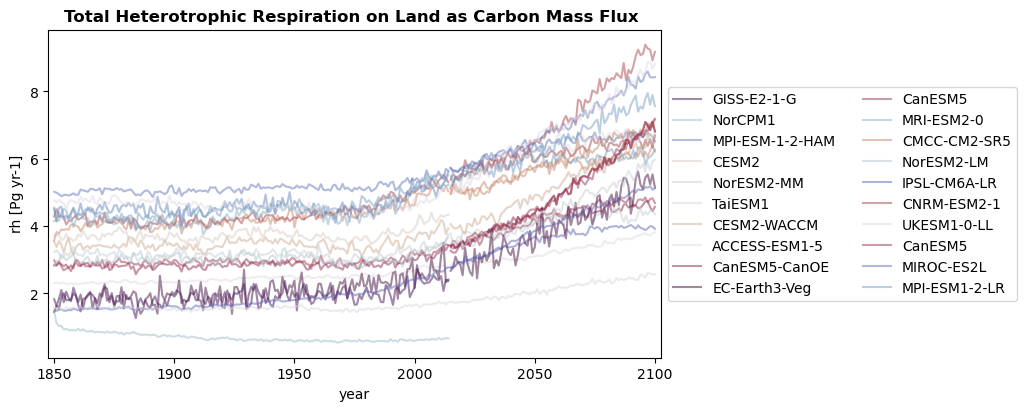

In [114]:

color_code = "model"

variables = ["fgco2", "intpp", "intpoc", "intdic", "intdoc", "fric", "froc", "ocfriver", "cSoil", "cVeg", "fLuc", "gpp", "nbp", "nep", "npp", "ra", "rh"]#

for var in variables[:]:
    fig, ax = plt.subplots(1, figsize=(8,4), constrained_layout=True)
    plotted_models = []
    for scenario in ["historical", "ssp126", "ssp370"]:
        files = sorted(glob.glob(datapath + f"{var}/{var}_{region}_*_{scenario}.nc"))
    
        df = file_to_dataframe(files, var)
        for model in df.columns:
            if color_code == "scenarios":
                color = scenario_colors[scenario]
                label_color = "grey"
                alpha = 0.3
            else:
                color = model_colors[model.split("_")[0]]
                label_color = model_colors[model.split("_")[0]]
                #print(label_color)
                alpha=0.5
            ax.plot(df.index, df[model], color=color, alpha=alpha)
            plotted_models.append(model)

    for model in set(plotted_models):
        
        if color_code == "scenarios":
            label_color = "grey"
        else:
            label_color = model_colors[model.split("_")[0]]
        ax.plot(np.nan, np.nan, label=model.split("_")[0], alpha=alpha, color=label_color)
    
    ds = xr.open_dataset(files[0])
    ax.set_title(var_names[var], fontweight="bold")
    unit = ds[var].attrs["units"]
    ax.set_ylabel(f"{var} [{unit}]")
    ax.margins(x=0.01)
    ax.set_xlabel("year")
    if len(set(plotted_models))>15:
        ncols=2
        fig.set_size_inches(10.15, 4, forward=True)
    else:
        ncols=1
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=ncols)
    plt.savefig(plotpath + f"timeseries_{var}_allmodels_color-{color_code}.png", dpi=200)

## Fig.4: Global - cVeg, cSoil, NBP, fgco2

<img src="/home/u/u301557/ArcticCarbon/figures/RECCAPP-Fig4.png" alt="drawing" width="900"/>

In [145]:
files = sorted(glob.glob(datapath + f"*/*masked*.nc"))
all_models = modellist_from_files(files)
print(len(modellist))
modellist = sorted(modellist)
print(len(modellist))

37
37


In [117]:
colors = pl.cm.twilight_r(np.linspace(0,1,len(modellist)))
model_colors = dict.fromkeys(modellist)
for cnt, model in enumerate(modellist):
    model_colors[model] = colors[cnt]

In [158]:
#var = "cVeg"
#scenario = "ssp126"
#files = sorted(glob.glob(datapath + f"{var}/{var}*glob*{scenario}.nc"))

def file_to_dataframe(files, var):
    
    if scenario == "historical":
        years = np.arange(1850, 2015)
        start_date = pd.to_datetime('1850-01-01')
        end_date = pd.to_datetime('2014-12-31')
    else:
        years = np.arange(2015, 2101)
        start_date = pd.to_datetime('2015-01-01')
        end_date = pd.to_datetime('2100-12-31')
    
    df = pd.DataFrame({"year":years})
    df = df.set_index("year")
    
    #print(files)
    for file in files:
        try:
            model = file.split("/")[-1].split("_")[-3]
            member = file.split("/")[-1].split("_")[-2]
            
            ds = xr.open_dataset(file)
            # Create a datetime object representing the end date (2100)
            ds['time'] = ds.time.values.astype('datetime64[ns]')
            
            #ds['time'] = ds['time'].dt.to_datetime64(calendar='gregorian')
            # Slice the data based on the end date
            sliced_ds = ds.where(ds.time <= end_date, drop=True)
            sliced_ds = sliced_ds.where(sliced_ds.time >= start_date, drop=True)
            sliced_ds['time'] = sliced_ds.time.dt.year.values.astype('int')
            df_model = pd.DataFrame({"year":sliced_ds['time'].values})#sliced_ds['time'].values})
            df_model = df_model.set_index("year")
            df_model[model] = sliced_ds[var].values.squeeze()
            #df[model] = sliced_ds[var].values
            df = df.join(df_model, how='left', rsuffix=f'_{member}')
            nan_count = df[model].isnull().sum()
            if nan_count > 5:
                df = df.drop(model, axis=1)
                print(model, var, scenario, "too many NaNs")

            elif not number_check(df[model], var):
                df = df.drop(model, axis=1)
                print(model, var, scenario, "didnt pass number check")
            
            ds.close()
            
        except Exception as e:
            print(model, e, sliced_ds[var].values.shape, sliced_ds.time.values[:2], sliced_ds.time.values[-2:])
    
    
    return df

In [119]:
def number_check(array, var):
    in_range = True

    if var not in ["fric", "froc", "intpp", "ocfriver"]:
        if np.nanmax(array) > 1000:
            in_range = False
        if np.nanmin(array) < -20:
            in_range = False
    elif var in ["fric", "froc", "intpp", "ocfriver"]:
        if np.nanmax(array) > 1e14:
            in_range = False
        if np.nanmin(array) < -20:
            in_range = False
    
    return in_range

In [208]:
DF = {}

for var in ["cVeg", "cSoil", "nbp", "fgco2"]:#]):
    #print(var)
    DF[var] = {}
    for scenario in ["historical", "ssp126", "ssp370"][:]:
        #print(scenario)
        files = sorted(glob.glob(datapath + f"{var}/{var}*masked*{scenario}.nc"))
        DF[var][scenario] = file_to_dataframe(files, var)

CESM2-WACCM-FV2 cVeg historical too many NaNs
E3SM-1-1-ECA cVeg historical didnt pass number check
E3SM-1-1 cVeg historical didnt pass number check
GFDL-ESM4 cVeg historical too many NaNs


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM cVeg ssp370 too many NaNs
CESM2-WACCM cSoil historical didnt pass number check
CESM2 cSoil historical didnt pass number check
NorESM2-LM cSoil historical didnt pass number check


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

CESM2-WACCM cSoil ssp370 didnt pass number check
MPI-ESM-1-2-HAM cSoil ssp370 too many NaNs
E3SM-1-1-ECA nbp historical didnt pass number check
E3SM-1-1 nbp historical didnt pass number check
GISS-E2-1-G nbp historical didnt pass number check
GISS-E2-1-H nbp historical didnt pass number check


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

GISS-E2-1-G nbp ssp370 didnt pass number check
MPI-ESM-1-2-HAM nbp ssp370 too many NaNs
GISS-E2-1-G-CC fgco2 historical didnt pass number check
GISS-E2-1-G fgco2 historical didnt pass number check


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM fgco2 ssp370 too many NaNs


In [229]:
cVeg_Soil_1850  = {}
cVeg_Soil_1850["cVeg"] = {}
cVeg_Soil_1850["cSoil"] = {}
for var in ["cVeg", "cSoil"]:
    print(var)
    for scenario in ["historical", "ssp126", "ssp370"]:
        print(scenario)
        for model in DF[var][scenario].columns:
            try:
                if scenario == "historical":
                    cVeg_Soil_1850[var][model] = DF[var][scenario].iloc[0][model]
                
                DF[var][scenario][model] = DF[var][scenario][model] - cVeg_Soil_1850[var][model]
            except Exception as e:
                print(e)

cVeg
historical
ssp126
ssp370
cSoil
historical
ssp126
ssp370
'CanESM5_r1i1p2f1'


In [234]:
DF_selection.keys()

Index(['ACCESS-ESM1-5', 'AWI-ESM-1-1-LR', 'CESM2-FV2', 'CESM2-WACCM', 'CESM2',
       'CMCC-CM2-SR5', 'CNRM-ESM2-1', 'CanESM5-CanOE', 'CanESM5',
       'EC-Earth3-Veg', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MIROC-ES2L',
       'MPI-ESM-1-2-HAM', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorCPM1',
       'NorESM2-LM', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL'],
      dtype='object')

In [230]:
model_selection = []
variables_selection = ["cVeg", "cSoil", "nbp", "fgco2"]
sceanrio_selection  = ["historical", "ssp126", "ssp370"]
for model in all_models:
    check = True
    for var in variables_selection:
        for scenario in sceanrio_selection:
            if model not in DF[var][scenario].columns:
                check = False
    if check:
        model_selection.append(model)

print(model_selection)

['NorESM2-MM', 'CanESM5', 'IPSL-CM6A-LR', 'CNRM-ESM2-1', 'UKESM1-0-LL', 'MIROC-ES2L', 'MPI-ESM1-2-LR']


In [235]:
DF_selection = DF.copy()

for var in variables_selection:
        for scenario in sceanrio_selection:
            if "CanESM5_r1i1p2f1" in DF_selection[var][scenario].columns:
                DF_selection[var][scenario] = DF_selection[var][scenario].drop("CanESM5_r1i1p2f1", axis=1)
            for model in DF[var][scenario].columns:
                if model not in model_selection:
                    DF_selection[var][scenario] = DF_selection[var][scenario].drop(model, axis=1)

In [236]:
DF_selection["cSoil"]["ssp370"]

CNRM-ESM2-1    CanESM5  IPSL-CM6A-LR  MIROC-ES2L  MPI-ESM1-2-LR   
year                                                                    
2015    11.737321   0.419220      7.030036    6.379642       4.132278  \
2016    11.970136   0.386202      7.197109    6.551630       4.286577   
2017    12.195721   0.358977      7.364280    6.695766       4.414036   
2018    12.424614   0.333335      7.530323    6.851042       4.484697   
2019    12.657267   0.303002      7.690638    7.027859       4.567008   
...           ...        ...           ...         ...            ...   
2096    43.111020  12.241162     22.563025   33.465452      12.272082   
2097    43.504320  12.704522     22.662167   33.887014      12.235958   
2098    43.922234  13.212150     22.754386   34.269592      12.190946   
2099    44.309622  13.692434     22.850323   34.706733      12.185858   
2100    44.731524  14.163073     22.951019   35.172955      12.238267   

      NorESM2-MM  UKESM1-0-LL  
year                           
2015    0.229895    -4.522064  
2016    0.227993    -4.215803  
2017    0.257447    -3.974371  
2018    0.266801    -3.741234  
2019    0.247625    -3.484043  
...          ...          ...  
2096   -1.655741    15.818866  
2097   -1.773309    15.906858  
2098   -1.875490    15.946839  
2099   -1.950820    16.073145  
2100   -2.037188    16.220961  

[86 rows x 7 columns]

<AxesSubplot:xlabel='year'>

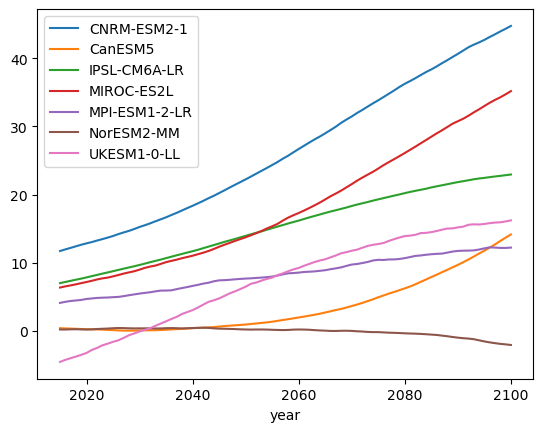

In [237]:
DF_selection["cSoil"]["ssp370"].plot()

(0.0, 0.3)

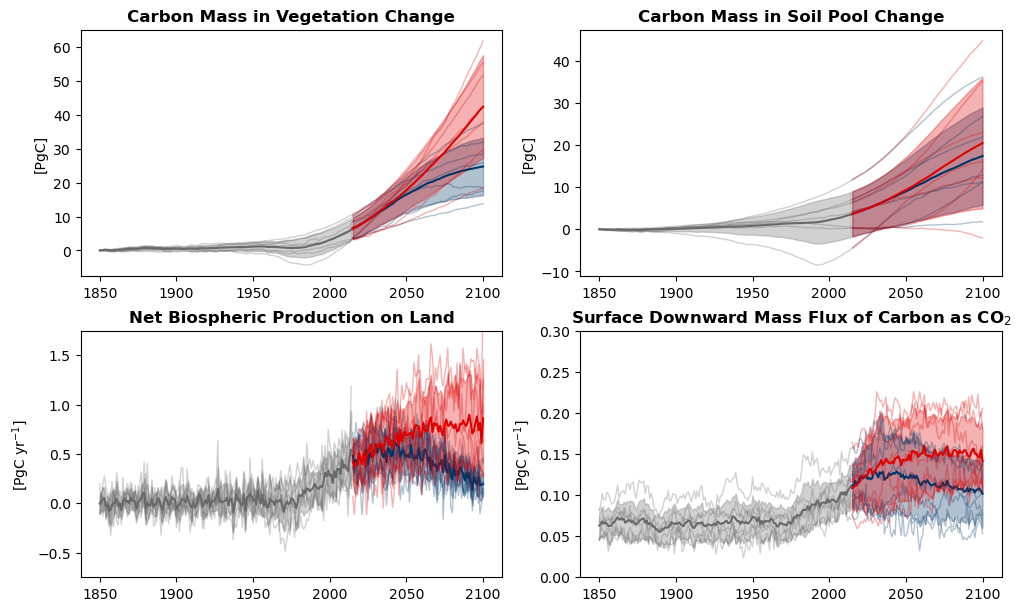

In [238]:
fig, axs = plt.subplots(2,2, figsize=(10,6), constrained_layout=True)#tight_layout=True, 

cVeg_Soil_1850  = {}
cVeg_Soil_1850["cVeg"] = {}
cVeg_Soil_1850["cSoil"] = {}

color_code = "scenarios" # models scenarios

cc_ssps   = {"ssp119" :"#00a9cf",
             "ssp126" :"#003466",
             "ssp245" :"#f69320",
             "ssp370" :"#df0000",
             "ssp585" :"#980002", 
             "historical":"dimgray"}

#names = {"cVeg":"vegetation carbon", "cSoil":"soil carbon", "nbp":"net land flux", "fgco2":"net ocean flux"}

for ax,var in zip(axs.flatten(),["cVeg", "cSoil", "nbp", "fgco2"]):#]):
    ax.set_title(var_names[var], fontweight="bold")
    if var in ["cVeg", "cSoil"]:
        ax.set_title(var_names[var] + " Change", fontweight="bold")
    for scenario in ["historical", "ssp126", "ssp370"]:
        for model in model_selection:
            try:
                if color_code == "models":
                    color = model_colors[model]
                    lw = 1
                    alpha=1
                else:
                    color = cc_ssps[scenario]
                    lw = 1
                    alpha=0.3
                    
                ax.plot(DF_selection[var][scenario].index, DF_selection[var][scenario][model], color=color, lw=lw, alpha=alpha)
            except Exception as e:
                print(e)
        if color_code == "scenarios":
            mean = DF_selection[var][scenario].mean(axis=1)
            std = DF_selection[var][scenario].std(axis=1)
            ax.plot(mean, color=color)
            ax.fill_between(DF_selection[var][scenario].index, mean-std, mean+std, color=color, alpha=0.3)
for ax in axs[0,:]:
    ax.set_ylabel(f"[PgC]")
    #ax.set_ylim(-20,70)
for ax in axs[1,:]:
    ax.set_ylabel("[PgC yr$^{-1}]$")
axs[1,0].set_ylim(-0.75,1.75)
axs[1,1].set_ylim(0,0.3)

(0.0, 0.3)

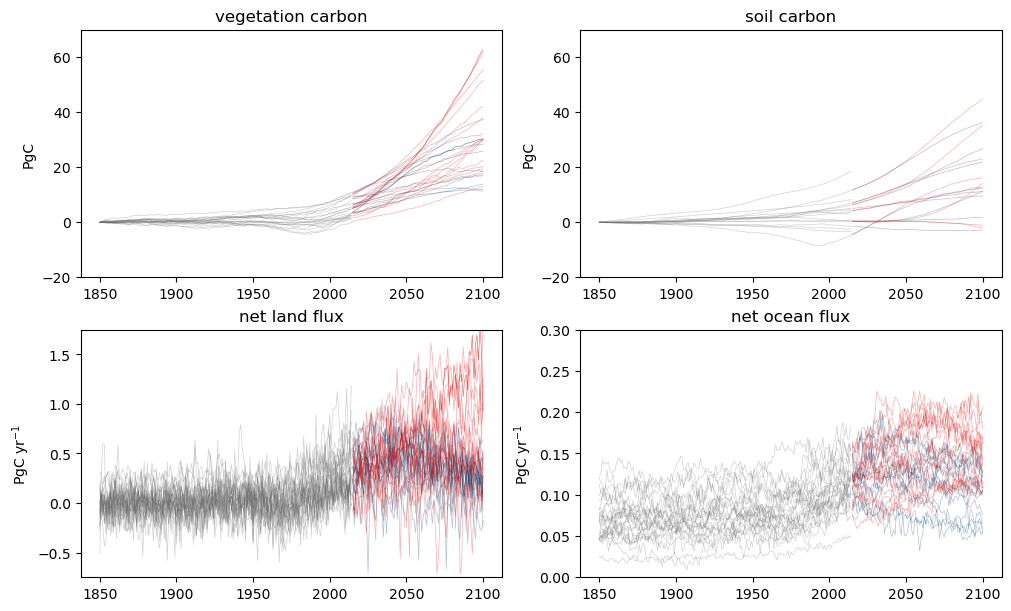

In [130]:
fig, axs = plt.subplots(2,2, figsize=(10,6), constrained_layout=True)#tight_layout=True, 

cVeg_Soil_1850  = {}
cVeg_Soil_1850["cVeg"] = {}
cVeg_Soil_1850["cSoil"] = {}

color_code = "scenarios" # models scenarios

cc_ssps   = {"ssp119" :"#00a9cf",
             "ssp126" :"#003466",
             "ssp245" :"#f69320",
             "ssp370" :"#df0000",
             "ssp585" :"#980002", 
             "historical":"dimgray"}

names = {"cVeg":"vegetation carbon", "cSoil":"soil carbon", "nbp":"net land flux", "fgco2":"net ocean flux"}

for ax,var in zip(axs.flatten(),["cVeg", "cSoil", "nbp", "fgco2"]):#]):
    ax.set_title(var_names[var])
    for scenario in ["historical", "ssp126", "ssp370"]:
        for model in DF[var][scenario].columns:
            
            if model == "NorCPM1":
                pass
            else:
                try:
                    if color_code == "models":
                        color = model_colors[model]
                        lw = 1
                        alpha=1
                    else:
                        color = cc_ssps[scenario]
                        lw = 0.5
                        alpha=0.3
                        
                    ax.plot(DF[var][scenario].index, DF[var][scenario][model], color=color, lw=lw, alpha=alpha)
                except Exception as e:
                    print(e)
        if color_code == "scenarios":
            mean = DF[var][scenario].mean(axis=1)
            std = DF[var][scenario].std(axis=1)
            #ax.plot(mean, color=color)
            #ax.fill_between(DF[var][scenario].index, mean-std, mean+std, color=color, alpha=0.3)
for ax in axs[0,:]:
    ax.set_ylabel("PgC")
    ax.set_ylim(-20,70)
for ax in axs[1,:]:
    ax.set_ylabel("PgC yr$^{-1}$")
axs[1,0].set_ylim(-0.75,1.75)
axs[1,1].set_ylim(0,0.3)

## "Tables"

<img src="/home/u/u301557/ArcticCarbon/figures/RECCAP-Tab11.png" alt="drawing" width="900"/>

In [142]:
def files_to_dataframe(files, var):
    years = np.arange(1850, 2015)
    df = pd.DataFrame({"year":years})#
    
    for file in files:
        try:
            model = file.split("/")[-1].split("_")[-3]
            ds = xr.open_dataset(file)
            df[model] = ds[var].values
            ds.close()
        except Exception as e:
            print(e)
    
    df = df.set_index("year")

    return df

In [155]:
DF_60 = {}
scenario = "historical"
for var in ["gpp", "npp", "nep", "nbp","fgco2", "fLuc", "cVeg", "cSoil", "terra_carbon"]:#]):
    #print(var)
    #DF_60[var] = {}
    #for scenario in ["historical", "ssp126", "ssp370"][:]:
        #print(scenario)
        files = sorted(glob.glob(datapath + f"{var}/{var}*masked*{scenario}.nc"))
        print(var, len(files))
        DF_60[var] = file_to_dataframe(files, var)

gpp 38
CESM2-FV2 gpp historical too many NaNs
CESM2-WACCM-FV2 gpp historical too many NaNs
E3SM-1-1-ECA gpp historical didnt pass number check
E3SM-1-1 gpp historical didnt pass number check
npp 26
CESM2-FV2 npp historical too many NaNs
CESM2-WACCM-FV2 npp historical too many NaNs
nep 16
nbp 33
E3SM-1-1-ECA nbp historical didnt pass number check
E3SM-1-1 nbp historical didnt pass number check
GISS-E2-1-G nbp historical didnt pass number check
GISS-E2-1-H nbp historical didnt pass number check
fgco2 28
GISS-E2-1-G-CC fgco2 historical didnt pass number check
GISS-E2-1-G fgco2 historical didnt pass number check
fLuc 13
cVeg 27
CESM2-WACCM-FV2 cVeg historical too many NaNs
E3SM-1-1-ECA cVeg historical didnt pass number check
E3SM-1-1 cVeg historical didnt pass number check
GFDL-ESM4 cVeg historical too many NaNs
cSoil 20
CESM2-WACCM cSoil historical didnt pass number check
CESM2 cSoil historical didnt pass number check
NorESM2-LM cSoil historical didnt pass number check
terra_carbon 0


In [151]:
all_models

['CESM2-WACCM-FV2',
 'GISS-E2-1-G',
 'INM-CM4-8',
 'CNRM-CM6-1',
 'NorCPM1',
 'EC-Earth3-Veg-LR',
 'MPI-ESM-1-2-HAM',
 'CESM2',
 'NorESM2-MM',
 'TaiESM1',
 'GFDL-CM4',
 'CESM2-WACCM',
 'ACCESS-ESM1-5',
 'E3SM-1-1',
 'GISS-E2-1-H',
 'CanESM5-CanOE',
 'INM-CM5-0',
 'AWI-ESM-1-1-LR',
 'GFDL-ESM4',
 'EC-Earth3-Veg',
 'E3SM-1-1-ECA',
 'CanESM5',
 'CMCC-ESM2',
 'MRI-ESM2-0',
 'IPSL-CM5A2-INCA',
 'CESM2-FV2',
 'CMCC-CM2-SR5',
 'EC-Earth3-CC',
 'GISS-E2-1-G-CC',
 'MPI-ESM1-2-HR',
 'CNRM-CM6-1-HR',
 'NorESM2-LM',
 'IPSL-CM6A-LR',
 'CNRM-ESM2-1',
 'UKESM1-0-LL',
 'MIROC-ES2L',
 'MPI-ESM1-2-LR']

In [152]:
DF_60[var].columns

Index([], dtype='object')

24
'GISS-E2-1-G_r1i1p1f2'
gpp: mean=5.92, std=2.13
26
'GISS-E2-1-G_r1i1p1f2'
npp: mean=3.44, std=1.87
16
nep: mean=0.27, std=0.20
33
'CanESM5_r1i1p2f1'
nbp: mean=0.20, std=0.19
27
'CanESM5_r1i1p2f1'
fgco2: mean=0.32, std=0.19
13
fLuc: mean=0.02, std=0.02


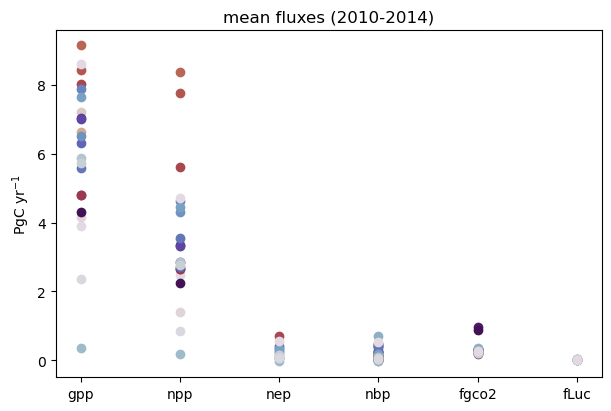

In [13]:
variables = ["gpp", "npp", "nep", "nbp","fgco2", "fLuc"]#, "cVeg", "cSoil", "terra_carbon"
fig, ax = plt.subplots(1,1, figsize=(6,4), constrained_layout=True)#tight_layout=True, 

for i,var in enumerate(variables):#, "npp", "rh","ra"]):
    files_60 = sorted(glob.glob(outpath + f"{var}/{var}*N60*historical.nc"))
    print(len(files_60))
    df_60 = DF_60[var].copy()
    for model, value in df_60.loc[2010:2014].mean(axis=0).items():
        if value > 50:
            print(model)
        elif value < -50:
            print(model)
        else:
            try:
                ax.scatter(i, value, color=model_colors[model])
            except Exception as e:
                print(e)
        
    print(f"{var}: mean={df_60.loc[2010:2014].mean(axis=0).mean():1.2f}, std={df_60.loc[2010:2014].mean(axis=0).std():1.2f}")
ax.set_xticks(range(len(variables)), variables)
ax.set_title("mean fluxes (2010-2014)")
ax.set_ylabel("PgC yr$^{-1}$")
plt.show()
#plt.ylim(-1,6)

27
'CanESM5_r1i1p2f1'
cVeg: mean=27.77, std=14.05
20
cSoil: mean=452.24, std=551.96
19
terra_carbon: mean=476.84, std=571.41


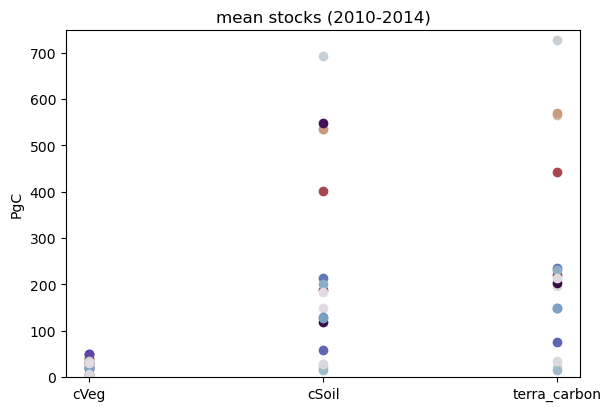

In [15]:
variables = ["cVeg", "cSoil", "terra_carbon"]#, "cVeg", "cSoil", "terra_carbon"
fig, ax = plt.subplots(1,1, figsize=(6,4), constrained_layout=True)#tight_layout=True, 

for i,var in enumerate(variables):#, "npp", "rh","ra"]):
    files_60 = sorted(glob.glob(outpath + f"{var}/{var}*N60*historical.nc"))
    print(len(files_60))
    df_60 = DF_60[var].copy()
    for model, value in df_60.loc[2010:2014].mean(axis=0).items():
        if value > 10000:
            print(model)
        elif value < 0:
            print(model)
        else:
            try:
                ax.scatter(i, value, color=model_colors[model])
            except Exception as e:
                print(e)
        
    print(f"{var}: mean={df_60.loc[2010:2014].mean(axis=0).mean():1.2f}, std={df_60.loc[2010:2014].mean(axis=0).std():1.2f}")
ax.set_xticks(range(len(variables)), variables)
ax.set_title("mean stocks (2010-2014)")
ax.set_ylabel("PgC")
ax.set_ylim(0,750)
plt.show()

## Regional: GPP, NBP, Terrestrial Carbon

<img src="./figures/RECCAP-Fig18.png" alt="drawing" width="900"/>

In [157]:
DF = {}

variables_selection = ["gpp", "npp", "nep", "nbp","fgco2", "fLuc", "cVeg", "cSoil"]
scenario = "historical"
for var in variables_selection:#]):
    #print(var)
    DF[var] = {}
    for scenario in ["historical", "ssp126", "ssp370"][:]:
        #print(scenario)
        files = sorted(glob.glob(datapath + f"{var}/{var}*masked*{scenario}.nc"))
        print(var, len(files))
        DF[var][scenario] = file_to_dataframe(files, var)

gpp 0
gpp 0
gpp 0
nbp 0
nbp 0
nbp 0
terra_carbon 0
terra_carbon 0
terra_carbon 0


In [160]:
model_selection = []
variables_selection = ["gpp", "npp", "nep", "nbp","fgco2", "fLuc", "cVeg", "cSoil"]
sceanrio_selection  = ["historical", "ssp126", "ssp370"]
for model in all_models:
    check = True
    for var in variables_selection:
        for scenario in sceanrio_selection:
            if model not in DF[var][scenario].columns:
                check = False
    if check:
        model_selection.append(model)

print(model_selection)

KeyError: 'gpp'

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(6,10), constrained_layout=True)#tight_layout=True, 

variables = ["gpp", "npp", "nep", "nbp","fgco2", "fLuc", "cVeg", "cSoil"]

cVeg_Soil_1850  = {}
cVeg_Soil_1850["cVeg"] = {}
cVeg_Soil_1850["cSoil"] = {}

color_code = "scenarios" # models scenarios

cc_ssps   = {"ssp119" :"#00a9cf",
             "ssp126" :"#003466",
             "ssp245" :"#f69320",
             "ssp370" :"#df0000",
             "ssp585" :"#980002", 
             "historical":"dimgray"}

names = {"gpp":"GPP", "terra_carbon":"terrestrial carbon","cVeg":"vegetation carbon", "cSoil":"soil carbon", "nbp":"NBP", "fgco2":"net ocean flux"}

for ax,var in zip(axs.flatten(),variables):#]):
    ax.set_title(names[var])
    for scenario in ["historical", "ssp126", "ssp370"]:
        for model in DF[var][scenario].columns:
            if model == "NorCPM1":
                pass
            else:
                try:
                    if color_code == "models":
                        color = model_colors[model]
                        lw = 1
                        alpha=1
                    else:
                        color = cc_ssps[scenario]
                        lw = 0.5
                        alpha=0.3
                        
                    ax.plot(DF[var][scenario].index, DF[var][scenario][model], color=color, lw=lw, alpha=alpha)
                except Exception as e:
                    print(e)
        if color_code == "scenarios":
            mean = DF[var][scenario].mean(axis=1)
            std = DF[var][scenario].std(axis=1)
            #ax.plot(mean, color=color)
            #ax.fill_between(DF[var][scenario].index, mean-std, mean+std, color=color, alpha=0.3)
#for ax in axs[0,:]:
#    ax.set_ylabel("PgC")
#    ax.set_ylim(-140,380)
#for ax in axs[1,:]:
#    ax.set_ylabel("PgC yr$^{-1}$")
#    ax.set_ylim(-4,10)

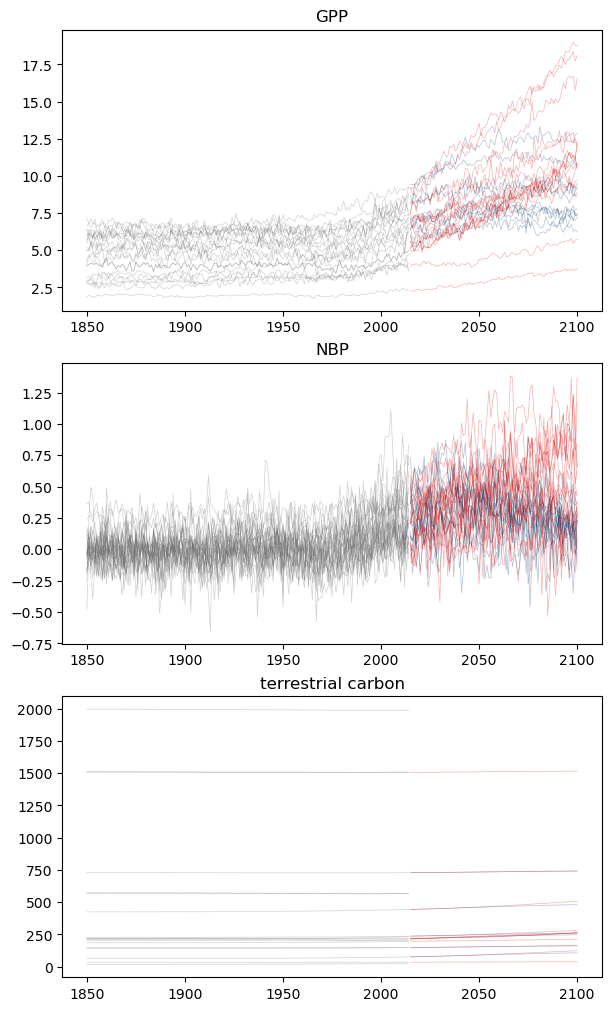

In [90]:
fig, axs = plt.subplots(3,1, figsize=(6,10), constrained_layout=True)#tight_layout=True, 

cVeg_Soil_1850  = {}
cVeg_Soil_1850["cVeg"] = {}
cVeg_Soil_1850["cSoil"] = {}

color_code = "scenarios" # models scenarios

cc_ssps   = {"ssp119" :"#00a9cf",
             "ssp126" :"#003466",
             "ssp245" :"#f69320",
             "ssp370" :"#df0000",
             "ssp585" :"#980002", 
             "historical":"dimgray"}

names = {"gpp":"GPP", "terra_carbon":"terrestrial carbon","cVeg":"vegetation carbon", "cSoil":"soil carbon", "nbp":"NBP", "fgco2":"net ocean flux"}

for ax,var in zip(axs.flatten(),["gpp", "nbp", "terra_carbon"]):#]):
    ax.set_title(names[var])
    for scenario in ["historical", "ssp126", "ssp370"]:
        for model in DF[var][scenario].columns:
            if model == "NorCPM1":
                pass
            else:
                try:
                    if color_code == "models":
                        color = model_colors[model]
                        lw = 1
                        alpha=1
                    else:
                        color = cc_ssps[scenario]
                        lw = 0.5
                        alpha=0.3
                        
                    ax.plot(DF[var][scenario].index, DF[var][scenario][model], color=color, lw=lw, alpha=alpha)
                except Exception as e:
                    print(e)
        if color_code == "scenarios":
            mean = DF[var][scenario].mean(axis=1)
            std = DF[var][scenario].std(axis=1)
            #ax.plot(mean, color=color)
            #ax.fill_between(DF[var][scenario].index, mean-std, mean+std, color=color, alpha=0.3)
#for ax in axs[0,:]:
#    ax.set_ylabel("PgC")
#    ax.set_ylim(-140,380)
#for ax in axs[1,:]:
#    ax.set_ylabel("PgC yr$^{-1}$")
#    ax.set_ylim(-4,10)

## Model selection

In [239]:
variables = ["gpp", "npp", "nep", "nbp", "fgco2", "cVeg", "cSoil", "fLuc"]#
sceanrio_selection  = ["historical", "ssp126", "ssp370"]

DF = {}

for var in variables:#]):
    DF[var] = {}
    for scenario in sceanrio_selection[:]:
        files = sorted(glob.glob(datapath + f"{var}/{var}*masked*{scenario}.nc"))
        DF[var][scenario] = file_to_dataframe(files, var)

CESM2-FV2 gpp historical too many NaNs
CESM2-WACCM-FV2 gpp historical too many NaNs
E3SM-1-1-ECA gpp historical didnt pass number check
E3SM-1-1 gpp historical didnt pass number check


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM gpp ssp370 too many NaNs
CESM2-FV2 npp historical too many NaNs
CESM2-WACCM-FV2 npp historical too many NaNs


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM npp ssp370 too many NaNs


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM nep ssp370 too many NaNs
E3SM-1-1-ECA nbp historical didnt pass number check
E3SM-1-1 nbp historical didnt pass number check
GISS-E2-1-G nbp historical didnt pass number check
GISS-E2-1-H nbp historical didnt pass number check


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

GISS-E2-1-G nbp ssp370 didnt pass number check
MPI-ESM-1-2-HAM nbp ssp370 too many NaNs
GISS-E2-1-G-CC fgco2 historical didnt pass number check
GISS-E2-1-G fgco2 historical didnt pass number check


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM fgco2 ssp370 too many NaNs
CESM2-WACCM-FV2 cVeg historical too many NaNs
E3SM-1-1-ECA cVeg historical didnt pass number check
E3SM-1-1 cVeg historical didnt pass number check
GFDL-ESM4 cVeg historical too many NaNs


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM cVeg ssp370 too many NaNs
CESM2-WACCM cSoil historical didnt pass number check
CESM2 cSoil historical didnt pass number check
NorESM2-LM cSoil historical didnt pass number check


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

CESM2-WACCM cSoil ssp370 didnt pass number check
MPI-ESM-1-2-HAM cSoil ssp370 too many NaNs


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.

MPI-ESM-1-2-HAM fLuc ssp370 too many NaNs


In [240]:
files = sorted(glob.glob(datapath + f"*/*masked*.nc"))
model_selection = []
all_models = modellist_from_files(files)

variables_selection = ["gpp", "nbp", "fgco2", "npp", "cVeg"]#, "nep", "cSoil"



for model in all_models:
    check = True
    for var in variables_selection:
        for scenario in sceanrio_selection:
            if model not in DF[var][scenario].columns:
                check = False
                
    if check:
        model_selection.append(model)

print(sorted(model_selection))

['CNRM-ESM2-1', 'CanESM5', 'CanESM5-CanOE', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MIROC-ES2L', 'MPI-ESM1-2-LR', 'NorESM2-MM', 'UKESM1-0-LL']


In [241]:
DF_selection = DF.copy()

for var in variables:
        for scenario in sceanrio_selection:
            for model in DF[var][scenario].columns:
                if model not in model_selection:
                    DF_selection[var][scenario] = DF_selection[var][scenario].drop(model, axis=1)

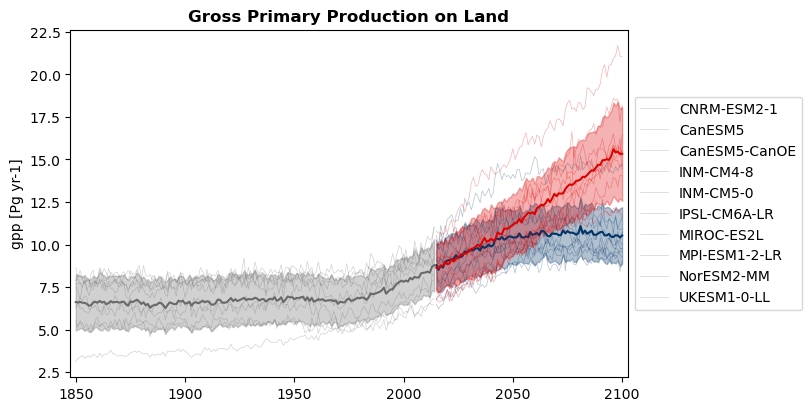

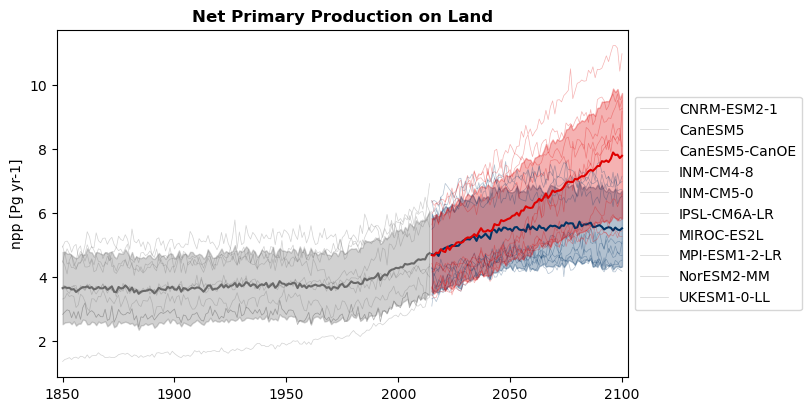

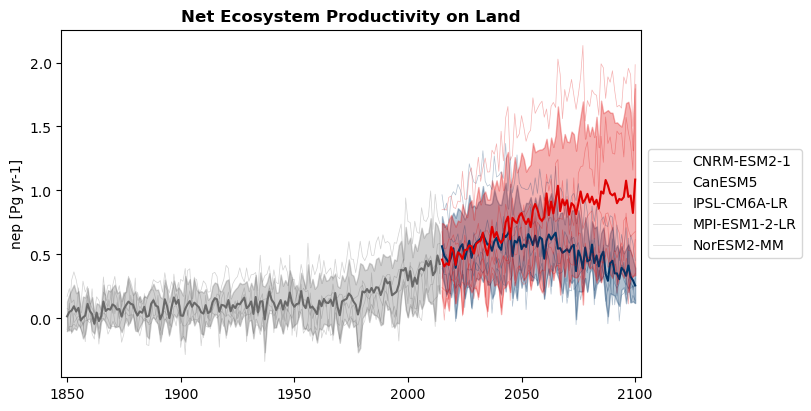

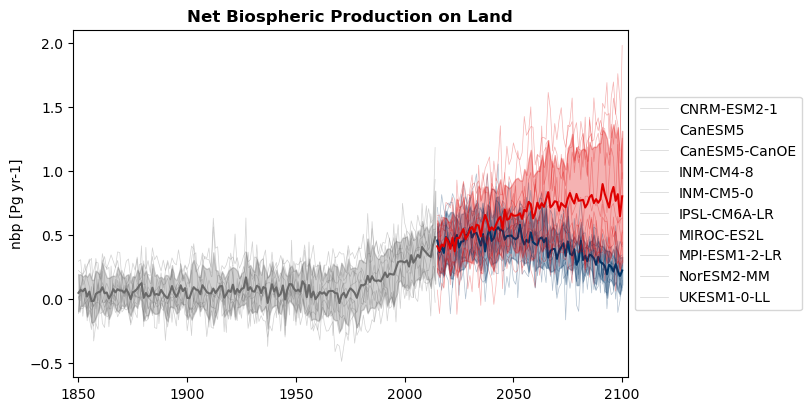

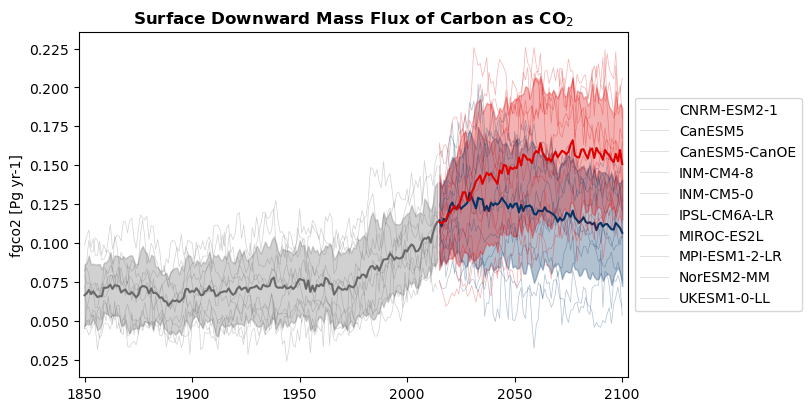

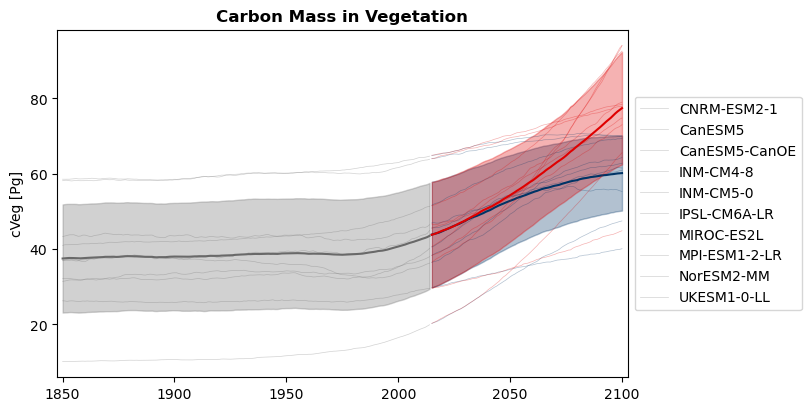

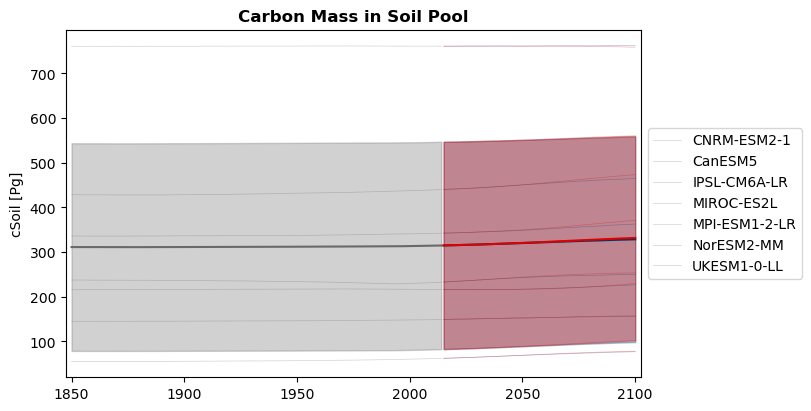

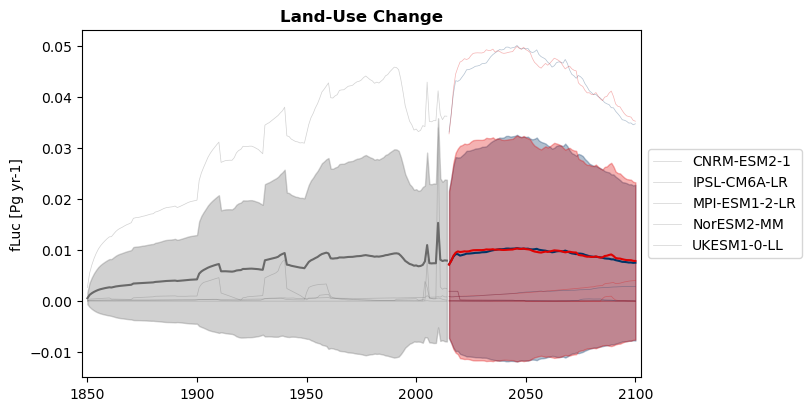

In [247]:
color_code="scenarios"

for var in variables:
    fig, ax = plt.subplots(1, figsize=(8,4), constrained_layout=True)

    ax.set_title(var_names[var], fontweight="bold")
    for scenario in ["historical", "ssp126", "ssp370"]:
        for model in sorted(DF_selection[var][scenario].columns):
            if model == "NorCPM1":
                pass
            if model not in model_selection:
                pass
            else:
                try:
                    if color_code == "models":
                        color = model_colors[model]
                        lw = 1
                        alpha=1
                    else:
                        color = cc_ssps[scenario]
                        lw = 0.5
                        alpha=0.3
                    if scenario == "historical":    
                        ax.plot(DF_selection[var][scenario].index, DF_selection[var][scenario][model], color=color, lw=lw, alpha=alpha, label=model)
                    else:
                        ax.plot(DF_selection[var][scenario].index, DF_selection[var][scenario][model], color=color, lw=lw, alpha=alpha)
                except Exception as e:
                    print(e)
        if color_code == "scenarios":
            mean = DF_selection[var][scenario].mean(axis=1)
            std = DF_selection[var][scenario].std(axis=1)
            ax.plot(mean, color=color)
            ax.fill_between(DF_selection[var][scenario].index, mean-std, mean+std, color=color, alpha=0.3)

    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ds = xr.open_dataset(glob.glob(datapath + f"{var}/*")[0])
    ax.set_title(var_names[var], fontweight="bold")
    unit = ds[var].attrs["units"]
    ax.set_ylabel(f"{var} [{unit}]")
    ax.margins(x=0.01)

    plt.savefig(plotpath + f"selection/timeseries_{var}_model-selection_color-{color_code}.png", dpi=200)

In [248]:
cVeg_Soil_1850  = {}
cVeg_Soil_1850["cVeg"] = {}
cVeg_Soil_1850["cSoil"] = {}
for var in ["cVeg", "cSoil"]:
    print(var)
    for scenario in ["historical", "ssp126", "ssp370"]:
        print(scenario)
        for model in DF_selection[var][scenario].columns:
            try:
                if scenario == "historical":
                    cVeg_Soil_1850[var][model] = DF_selection[var][scenario].iloc[0][model]
                
                DF_selection[var][scenario][model] = DF_selection[var][scenario][model] - cVeg_Soil_1850[var][model]
            except Exception as e:
                print(e)

cVeg
historical
ssp126
ssp370
cSoil
historical
ssp126
ssp370


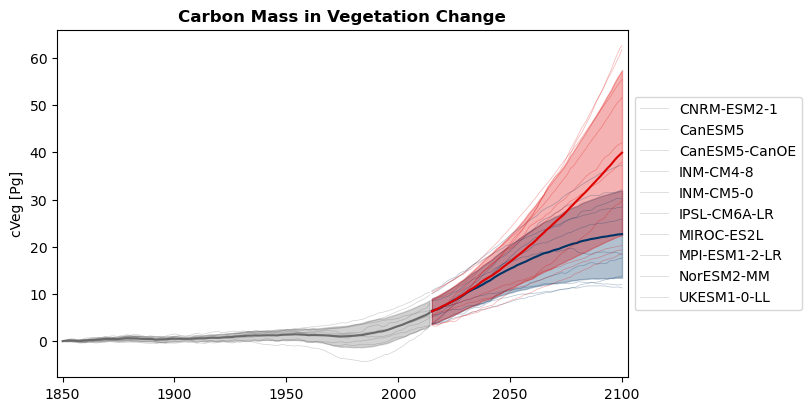

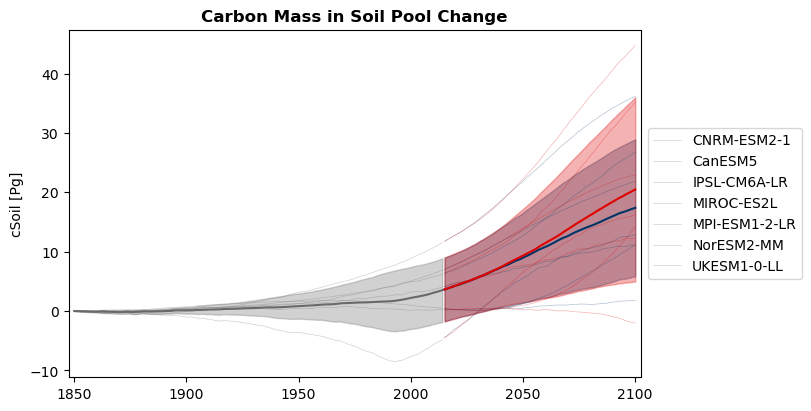

In [249]:
color_code="scenarios"

for var in ["cVeg", "cSoil"]:
    fig, ax = plt.subplots(1, figsize=(8,4), constrained_layout=True)

    ax.set_title(var_names[var], fontweight="bold")
    for scenario in ["historical", "ssp126", "ssp370"]:
        for model in sorted(DF_selection[var][scenario].columns):
            if model == "NorCPM1":
                pass
            if model not in model_selection:
                pass
            else:
                try:
                    if color_code == "models":
                        color = model_colors[model]
                        lw = 1
                        alpha=1
                    else:
                        color = cc_ssps[scenario]
                        lw = 0.5
                        alpha=0.3
                    if scenario == "historical":    
                        ax.plot(DF_selection[var][scenario].index, DF_selection[var][scenario][model], color=color, lw=lw, alpha=alpha, label=model)
                    else:
                        ax.plot(DF_selection[var][scenario].index, DF_selection[var][scenario][model], color=color, lw=lw, alpha=alpha)
                except Exception as e:
                    print(e)
        if color_code == "scenarios":
            mean = DF_selection[var][scenario].mean(axis=1)
            std = DF_selection[var][scenario].std(axis=1)
            ax.plot(mean, color=color)
            ax.fill_between(DF_selection[var][scenario].index, mean-std, mean+std, color=color, alpha=0.3)

    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ds = xr.open_dataset(glob.glob(datapath + f"{var}/*")[0])
    ax.set_title(var_names[var] + " Change", fontweight="bold")
    unit = ds[var].attrs["units"]
    ax.set_ylabel(f"{var} [{unit}]")
    ax.margins(x=0.01)

    plt.savefig(plotpath + f"selection/timeseries_{var}-change_model-selection_color-{color_code}.png", dpi=200)